## Problem Statement:  Handling Null Values in Python with Pandas

I have handled null values in a dataset using Python with the Pandas library, with different techniques such as identifying null values, dropping null values, filling null values, and using interpolation methods. 
I used the "California Housing Prices" dataset from Scikit-learn.

###  Tasks:

In [39]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


###### 1. Import the necessary libraries: Start by importing the required libraries, including Matplotlib, NumPy, and pandas.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [42]:
DataFrameHousingData = pd.read_csv("California_housing_dataset.csv") #reading my dataset

In [43]:
DataFrameHousingData.head(5)

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0,8.3252,NaN,6.984127,1.023810,322.0,2.555556,NaN,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,NaN,-122.22
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,NaN,-122.24
3,3,NaN,52.0,5.817352,1.073059,558.0,2.547945,NaN,-122.25
4,4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,NaN


In [44]:
DataFrameHousingData.columns

Index(['Unnamed: 0', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'Latitude', 'Longitude'],
      dtype='object')

In [45]:
DataFrameHousingData.drop('Unnamed: 0', inplace = True, axis = 1)

In [46]:
DataFrameHousingData.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,NaN,6.984127,1.023810,322.0,2.555556,NaN,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,NaN,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,NaN,-122.24
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,NaN,-122.25
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,NaN


<Axes: >

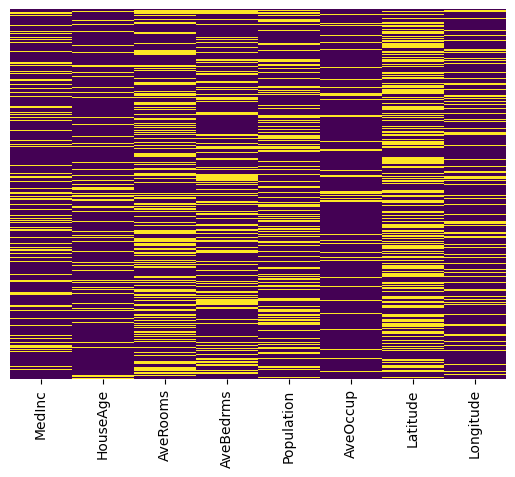

In [47]:
sns.heatmap(DataFrameHousingData.isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
# representation of null values using heatmap

In [48]:
dataFrameMedInc = DataFrameHousingData[['MedInc']] 
# create new data frame from MedInc column to calculate median,mean and fill,Bill,interpolate.
dataFrameMedInc['MedIncMean'] = dataFrameMedInc['MedInc'].fillna(dataFrameMedInc['MedInc'].mean())
dataFrameMedInc['MedIncMedian'] = dataFrameMedInc['MedInc'].fillna(dataFrameMedInc['MedInc'].median())
dataFrameMedInc['MedIncInterpolate'] = dataFrameMedInc['MedInc'].interpolate()
dataFrameMedInc['MedIncFfill'] = dataFrameMedInc['MedInc'].fillna(method = 'ffill')
dataFrameMedInc['MedIncBfill'] = dataFrameMedInc['MedInc'].fillna(method = 'bfill')
dataFrameMedInc.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2727757024.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2727757024.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2727757024.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

MedInc               1.907398
MedIncMean           1.677941
MedIncMedian         1.683900
MedIncInterpolate    1.866064
MedIncFfill          1.918659
MedIncBfill          1.905621
dtype: float64

In [49]:
DataFrameHousingData['MedInc'] = DataFrameHousingData['MedInc'].fillna(DataFrameHousingData['MedInc'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [50]:
dataFrameHouseAge = DataFrameHousingData[['HouseAge']] 
# create new data frame from HouseAge column to calculate median,mean and fill,Bill,interpolate.
dataFrameHouseAge['HouseAgeMean'] = dataFrameHouseAge['HouseAge'].fillna(dataFrameHouseAge['HouseAge'].mean())
dataFrameHouseAge['HouseAgeMedian'] = dataFrameHouseAge['HouseAge'].fillna(dataFrameHouseAge['HouseAge'].median())
dataFrameHouseAge['HouseAgeInterpolate'] = dataFrameHouseAge['HouseAge'].interpolate()
dataFrameHouseAge['HouseAgeFfill'] = dataFrameHouseAge['HouseAge'].fillna(method = 'ffill')
dataFrameHouseAge['HouseAgeBfill'] = dataFrameHouseAge['HouseAge'].fillna(method= 'bfill')
dataFrameHouseAge.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1650691483.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1650691483.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1650691483.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

HouseAge               12.586665
HouseAgeMean           11.485267
HouseAgeMedian         11.486316
HouseAgeInterpolate    12.378367
HouseAgeFfill          12.593228
HouseAgeBfill          12.618878
dtype: float64

In [51]:
DataFrameHousingData['HouseAge'] = DataFrameHousingData['HouseAge'].fillna(DataFrameHousingData['HouseAge'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [52]:
# create new data frame from AveRooms column to calculate median,mean and fill,Bill,interpolate.
dataFrameAveRooms = DataFrameHousingData[['AveRooms']] 
dataFrameAveRooms['HouseAgeMean'] = dataFrameAveRooms['AveRooms'].fillna(dataFrameAveRooms['AveRooms'].mean())
dataFrameAveRooms['HouseAgeMedian'] = dataFrameAveRooms['AveRooms'].fillna(dataFrameAveRooms['AveRooms'].median())
dataFrameAveRooms['HouseAgeInterpolate'] = dataFrameAveRooms['AveRooms'].interpolate()
dataFrameAveRooms['HouseAgeFfill'] = dataFrameAveRooms['AveRooms'].fillna(method = 'ffill')
dataFrameAveRooms['HouseAgeBfill'] = dataFrameAveRooms['AveRooms'].fillna(method= 'bfill')
dataFrameAveRooms.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1597876311.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1597876311.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/1597876311.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

AveRooms               2.073178
HouseAgeMean           1.696593
HouseAgeMedian         1.698717
HouseAgeInterpolate    1.984741
HouseAgeFfill          2.090361
HouseAgeBfill          2.050791
dtype: float64

In [53]:
DataFrameHousingData['AveRooms'] = DataFrameHousingData['AveRooms'].fillna(DataFrameHousingData['AveRooms'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [54]:
# create new data frame from AveBedrms column to calculate median,mean and fill,Bill,interpolate.
dataFrameAveRooms = DataFrameHousingData[['AveBedrms']] 
dataFrameAveRooms['AveBedrmsMean'] = dataFrameAveRooms['AveBedrms'].fillna(dataFrameAveRooms['AveBedrms'].mean())
dataFrameAveRooms['AveBedrmsMedian'] = dataFrameAveRooms['AveBedrms'].fillna(dataFrameAveRooms['AveBedrms'].median())
dataFrameAveRooms['AveBedrmsInterpolate'] = dataFrameAveRooms['AveBedrms'].interpolate()
dataFrameAveRooms['AveBedrmsFfill'] = dataFrameAveRooms['AveBedrms'].fillna(method = 'ffill')
dataFrameAveRooms['AveBedrmsBfill'] = dataFrameAveRooms['AveBedrms'].fillna(method= 'bfill')
dataFrameAveRooms.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2160233162.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2160233162.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2160233162.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

AveBedrms               0.495501
AveBedrmsMean           0.423981
AveBedrmsMedian         0.424490
AveBedrmsInterpolate    0.459594
AveBedrmsFfill          0.492482
AveBedrmsBfill          0.462642
dtype: float64

In [55]:
DataFrameHousingData['AveBedrms'] = DataFrameHousingData['AveBedrms'].fillna(DataFrameHousingData['AveBedrms'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [56]:
# create new data frame from Population column to calculate median,mean and fill,Bill,interpolate.
dataFramePopulation = DataFrameHousingData[['Population']] 
dataFramePopulation['PopulationMean'] = dataFramePopulation['Population'].fillna(dataFramePopulation['Population'].mean())
dataFramePopulation['PopulationMedian'] = dataFramePopulation['Population'].fillna(dataFramePopulation['Population'].median())
dataFramePopulation['PopulationInterpolate'] = dataFramePopulation['Population'].interpolate()
dataFramePopulation['PopulationFfill'] = dataFramePopulation['Population'].fillna(method = 'ffill')
dataFramePopulation['PopulationBfill'] = dataFramePopulation['Population'].fillna(method= 'bfill')
dataFramePopulation.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3628234542.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3628234542.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3628234542.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Population               1149.677678
PopulationMean            977.531450
PopulationMedian          984.386266
PopulationInterpolate    1079.909174
PopulationFfill          1155.985162
PopulationBfill          1133.792380
dtype: float64

In [57]:
DataFrameHousingData['Population'] = DataFrameHousingData['Population'].fillna(DataFrameHousingData['Population'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [58]:
# create new data frame from AveOccup column to calculate median,mean and fill,Bill,interpolate.
dataFrameAveOccup = DataFrameHousingData[['AveOccup']] 
dataFrameAveOccup['AveOccupMean'] = dataFrameAveOccup['AveOccup'].fillna(dataFrameAveOccup['AveOccup'].mean())
dataFrameAveOccup['AveOccupMedian'] = dataFrameAveOccup['AveOccup'].fillna(dataFrameAveOccup['AveOccup'].median())
dataFrameAveOccup['AveOccupInterpolate'] = dataFrameAveOccup['AveOccup'].interpolate()
dataFrameAveOccup['AveOccupFfill'] = dataFrameAveOccup['AveOccup'].fillna(method = 'ffill')
dataFrameAveOccup['AveOccupBfill'] = dataFrameAveOccup['AveOccup'].fillna(method= 'bfill')
dataFrameAveOccup.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3549644036.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3549644036.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3549644036.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

AveOccup               10.175730
AveOccupMean            9.654559
AveOccupMedian          9.654800
AveOccupInterpolate    10.577950
AveOccupFfill           9.657575
AveOccupBfill          12.955478
dtype: float64

In [59]:
DataFrameHousingData['AveOccup'] = DataFrameHousingData['AveOccup'].fillna(DataFrameHousingData['AveOccup'].mean()) 
# Replace null values with mean, as it has less standard deviation 

In [60]:
# create new data frame from AveOccupMean column to calculate median,mean and fill,Bill,interpolate.
dataFrameLatitude = DataFrameHousingData[['Latitude']] 
dataFrameLatitude['AveOccupMean'] = dataFrameLatitude['Latitude'].fillna(dataFrameLatitude['Latitude'].mean())
dataFrameLatitude['AveOccupMedian'] = dataFrameLatitude['Latitude'].fillna(dataFrameLatitude['Latitude'].median())
dataFrameLatitude['AveOccupInterpolate'] = dataFrameLatitude['Latitude'].interpolate()
dataFrameLatitude['AveOccupFfill'] = dataFrameLatitude['Latitude'].fillna(method = 'ffill')
dataFrameLatitude['AveOccupBfill'] = dataFrameLatitude['Latitude'].fillna(method= 'bfill')
dataFrameLatitude.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3591381367.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3591381367.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/3591381367.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Latitude               2.129505
AveOccupMean           1.605195
AveOccupMedian         1.743200
AveOccupInterpolate    2.135903
AveOccupFfill          2.138345
AveOccupBfill          2.138025
dtype: float64

In [61]:
DataFrameHousingData['Latitude'] = DataFrameHousingData['Latitude'].fillna(DataFrameHousingData['Latitude'].mean())
# Replace null values with mean, as it has less standard deviation 

In [62]:
# create new data frame from AveOccupMean column to calculate median,mean and fill,Bill,interpolate.
dataFrameLongitude = DataFrameHousingData[['Longitude']] 
dataFrameLongitude['AveOccupMean'] = dataFrameLongitude['Longitude'].fillna(dataFrameLongitude['Longitude'].mean())
dataFrameLongitude['AveOccupMedian'] = dataFrameLongitude['Longitude'].fillna(dataFrameLongitude['Longitude'].median())
dataFrameLongitude['AveOccupInterpolate'] = dataFrameLongitude['Longitude'].interpolate()
dataFrameLongitude['AveOccupFfill'] = dataFrameLongitude['Longitude'].fillna(method = 'ffill')
dataFrameLongitude['AveOccupBfill'] = dataFrameLongitude['Longitude'].fillna(method= 'bfill')
dataFrameLongitude.std()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/129834841.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/129834841.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/129834841.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Longitude              2.004005
AveOccupMean           1.770965
AveOccupMedian         1.825765
AveOccupInterpolate    2.002800
AveOccupFfill          2.003448
AveOccupBfill          2.002982
dtype: float64

In [63]:
DataFrameHousingData['Longitude'] = DataFrameHousingData['Longitude'].fillna(DataFrameHousingData['Longitude'].mean()) 
# Replace null values with mean, as it has less standard deviation 

<Axes: >

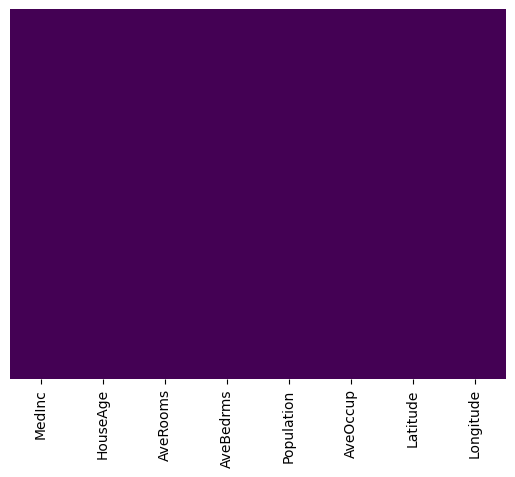

In [64]:
sns.heatmap(DataFrameHousingData.isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
#  heatmap represents null values.... (This dataset has no null values)

In [65]:
DataFrameHousingData.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325200,28.584196,6.984127,1.023810,322.00000,2.555556,35.642351,-122.230000
1,8.301400,21.000000,6.238137,0.971880,2401.00000,2.109842,35.642351,-122.220000
2,7.257400,52.000000,8.288136,1.073446,496.00000,2.802260,35.642351,-122.240000
3,3.873352,52.000000,5.817352,1.073059,558.00000,2.547945,35.642351,-122.250000
4,3.873352,52.000000,6.281853,1.081081,565.00000,2.181467,37.850000,-119.553389
5,4.036800,52.000000,4.761658,1.095199,1423.12056,2.139896,37.850000,-122.250000
6,3.873352,52.000000,4.931907,0.951362,1423.12056,2.128405,37.840000,-122.250000
7,3.120000,52.000000,4.797527,1.095199,1157.00000,1.788253,37.840000,-122.250000
8,2.080400,42.000000,4.294118,1.095199,1206.00000,2.026891,35.642351,-122.260000
9,3.691200,52.000000,4.970588,1.095199,1551.00000,2.172269,37.840000,-122.250000


##### Plot heatmap to repesent correlation between different columns

In [66]:
corrHousingData = DataFrameHousingData.corr()
# find corr between all columns of dataset

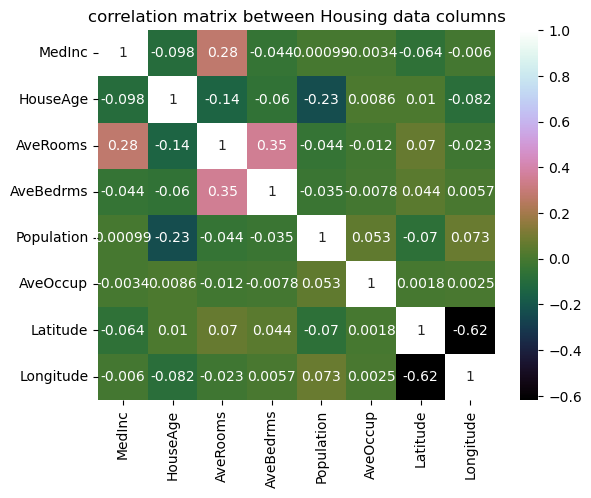

In [67]:
heatMap = sns.heatmap(corrHousingData, cmap="cubehelix", annot=True)
plt.title("correlation matrix between Housing data columns")
plt.show()
# display correlation 

##### plot pairplot between 3 columns('AveRooms', 'AveBedrms', 'AveOccup') with grouping of HouseAge

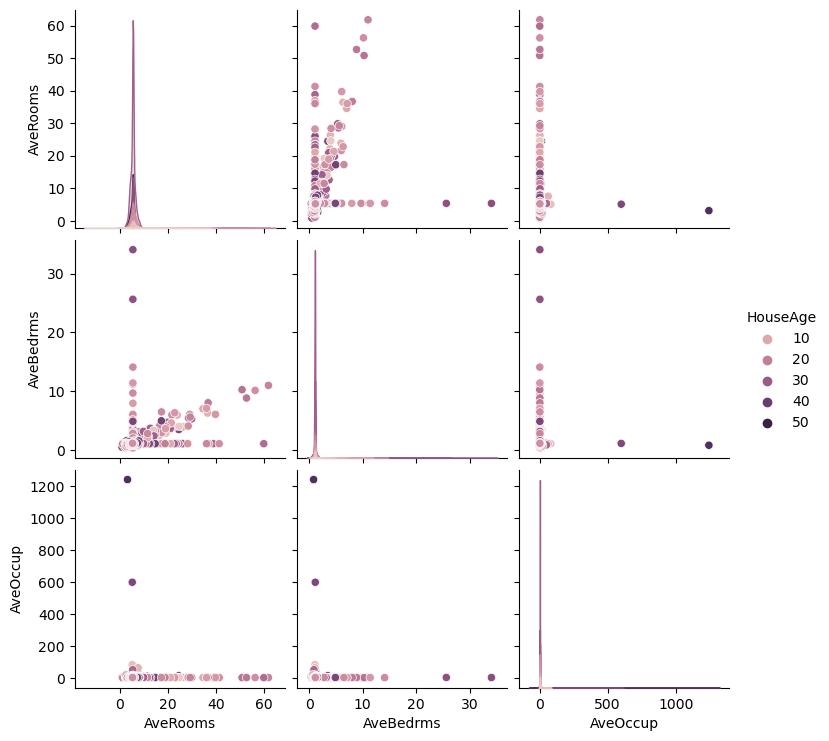

In [68]:
sns.pairplot(DataFrameHousingData,vars = ['AveRooms', 'AveBedrms', 'AveOccup'], 
             hue = "HouseAge")
plt.show()

In [69]:
# i have ploted two geographical graphs using two different libraries, 
# with longitude and Latitude columns

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3785/2878795785.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



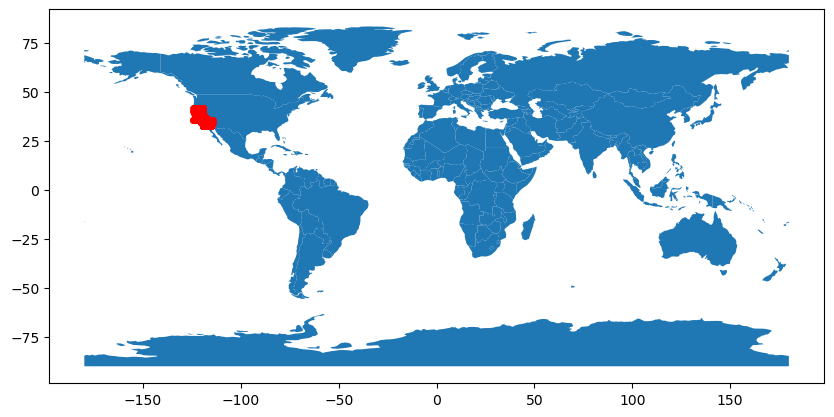

In [70]:
geometry = [Point(xy) for xy in zip(DataFrameHousingData['Longitude'], DataFrameHousingData['Latitude'])]
gdf = GeoDataFrame(DataFrameHousingData, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [71]:
fig = px.scatter_geo(DataFrameHousingData, lat = DataFrameHousingData['Latitude'], 
                     lon = DataFrameHousingData['Longitude'])
fig.update_layout(title = 'California Housing Map', title_x = 0.5)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>,
        <Axes: title={'center': 'AveBedrms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>]], dtype=object)

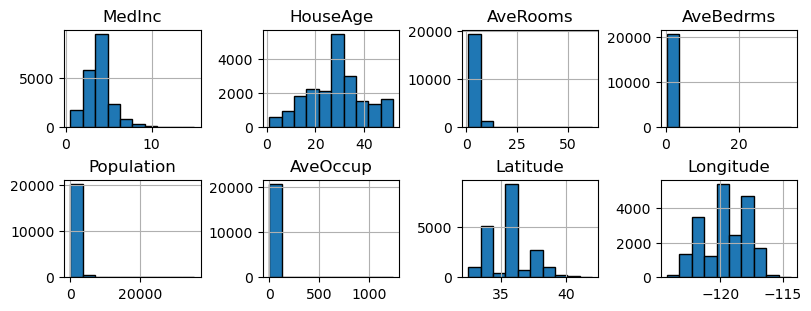

In [72]:
#create histogram for each column in DataFrame
fig, axis = plt.subplots(2, 4,figsize=(8,3),constrained_layout=True)
DataFrameHousingData.hist(ax=axis, edgecolor='black', grid=True)